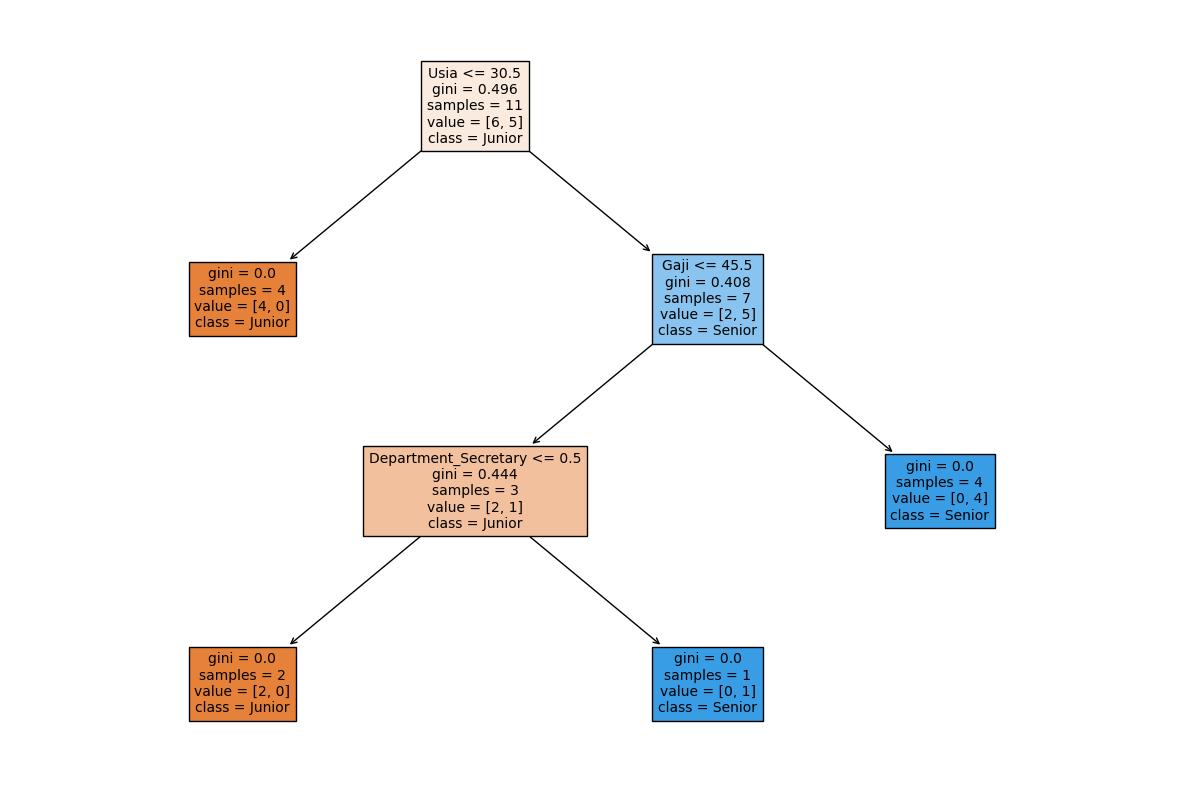

In [23]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import matplotlib.pyplot as plt

def convert_range_to_list(value):
    clean_value = value.replace('thn', '').replace('jt', '').strip()
    range_list = clean_value.split('-')
    return [int(x) for x in range_list]

def calculate_average(range_list):
    return sum(range_list) / len(range_list)

data = {
    'Department': ['Sales', 'Sales', 'Sales', 'Systems', 'Systems', 'Systems', 'Systems', 
                   'Marketing', 'Marketing', 'Secretary', 'Secretary'],
    'Status': ['Senior', 'Junior', 'Junior', 'Junior', 'Senior', 'Junior', 'Senior', 
               'Senior', 'Junior', 'Senior', 'Junior'],
    'Usia': ['31-35 thn', '26-30 thn', '31-35 thn', '21-25 thn', '31-35 thn', '26-30 thn', 
             '41-45 thn', '36-40 thn', '31-35 thn', '46-50 thn', '26-30 thn'],
    'Gaji': ['46-50 jt', '26-30 jt', '31-25 jt', '46-50 jt', '66-70 jt', '46-50 jt', 
             '66-70 jt', '46-50 jt', '41-45 jt', '36-40 jt', '36-30 jt'],
    'Jumlah': [30, 40, 40, 20, 5, 3, 3, 10, 4, 4, 6]
}

df = pd.DataFrame(data)

df['Usia'] = df['Usia'].apply(convert_range_to_list)
df['Gaji'] = df['Gaji'].apply(convert_range_to_list)

df['Usia'] = df['Usia'].apply(calculate_average)
df['Gaji'] = df['Gaji'].apply(calculate_average)

df = pd.get_dummies(df, columns=['Department'])

X = df.drop(columns=['Status'])
y = df['Status']

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, fontsize=10)
plt.show()